In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/sulphates.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ph            3276 non-null   float64
 1   Hardness      3276 non-null   float64
 2   Solids        3276 non-null   float64
 3   Conductivity  3276 non-null   float64
 4   Turbidity     3276 non-null   float64
 5   Sulfate       3276 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


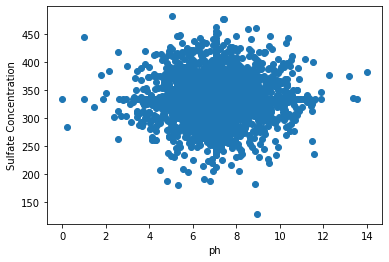

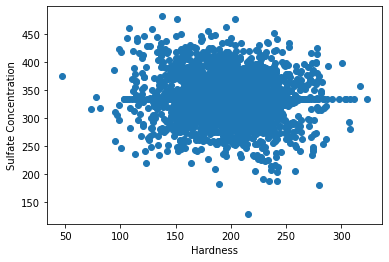

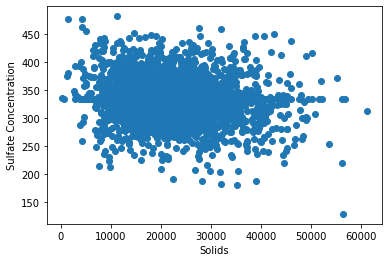

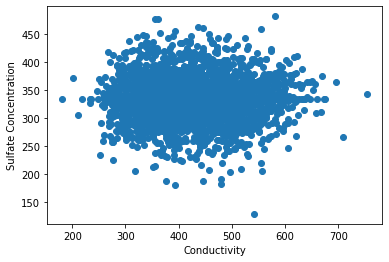

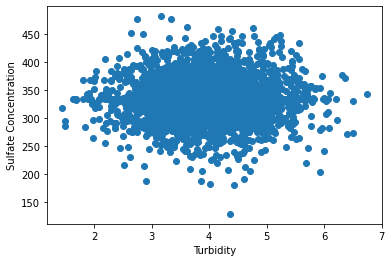

In [4]:
import matplotlib.pyplot as plt
for feature in range(len(df.columns)-1):
    plt.scatter(df[df.columns[feature]], df["Sulfate"])
    plt.xlabel(df.columns[feature])
    plt.ylabel("Sulfate Concentration")
    plt.show()

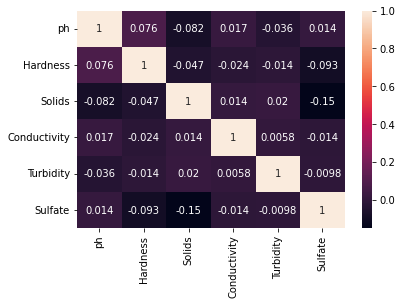

In [5]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
from pycaret.regression import *
regression = setup(df, target='Sulfate', fold = 12, session_id=123, normalize=True, transformation = True, transform_target = True, 
                  remove_multicollinearity = True, normalize_method = 'robust')
best_model = compare_models()
regression_results = pull()
print(regression_results)

,Description,Value
0,Session id,123
1,Target,Sulfate
2,Target type,Regression
3,Original data shape,"(3276, 6)"
4,Transformed data shape,"(3276, 6)"
5,Transformed train set shape,"(2293, 6)"
6,Transformed test set shape,"(983, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,25.0270,1247.0108,35.2334,0.0173,0.1089,0.0778,0.6567
ridge,Ridge Regression,25.0261,1247.0053,35.2333,0.0173,0.1089,0.0778,0.7975
lar,Least Angle Regression,25.0270,1247.0107,35.2334,0.0173,0.1089,0.0778,0.8092
br,Bayesian Ridge,24.9425,1247.2327,35.2373,0.0172,0.1089,0.0776,0.7900
lasso,Lasso Regression,24.9594,1247.4793,35.2406,0.0170,0.1089,0.0776,0.8092
huber,Huber Regressor,24.6672,1249.0579,35.2687,0.0154,0.1089,0.0766,0.7975
en,Elastic Net,24.5741,1252.5872,35.3181,0.0128,0.1092,0.0765,0.7875
omp,Orthogonal Matching Pursuit,24.8239,1255.1328,35.3554,0.0105,0.1092,0.0772,0.7942
par,Passive Aggressive Regressor,24.4909,1265.6825,35.5070,0.0020,0.1097,0.0762,0.8025
llar,Lasso Least Angle Regression,24.3594,1276.0587,35.6507,-0.0059,0.1102,0.0760,0.8017


                                    Model      MAE        MSE     RMSE  \
lr                      Linear Regression  25.0270  1247.0108  35.2334   
ridge                    Ridge Regression  25.0261  1247.0053  35.2333   
lar                Least Angle Regression  25.0270  1247.0107  35.2334   
br                         Bayesian Ridge  24.9425  1247.2327  35.2373   
lasso                    Lasso Regression  24.9594  1247.4793  35.2406   
huber                     Huber Regressor  24.6672  1249.0579  35.2687   
en                            Elastic Net  24.5741  1252.5872  35.3181   
omp           Orthogonal Matching Pursuit  24.8239  1255.1328  35.3554   
par          Passive Aggressive Regressor  24.4909  1265.6825  35.5070   
llar         Lasso Least Angle Regression  24.3594  1276.0587  35.6507   
dummy                     Dummy Regressor  24.3594  1276.0587  35.6507   
ada                    AdaBoost Regressor  26.2513  1288.8675  35.8202   
gbr           Gradient Boosting Regres

In [7]:
import pickle 
pickle.dump(best_model, open("Models/Sulfates_Regressor.pkl", "wb"))

In [8]:
final_best = finalize_model(best_model)
save_model(final_best, 'Sulfate_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Lenovo\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ph', 'Hardness', 'Solids',
                                              'Conductivity', 'Turbidity'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', ElasticNet(random_state=1358))]),
 'Sulfate_pipeline.pkl')